In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet("C:/Users/ZhipuCUI/Dropbox/PC/Documents/GitHub/HCYPPD/data/raw/france.parquet")

In [3]:
data['date'] = data.index

In [4]:
data.columns.values

array(['rr24', 't', 't_max', 't_min', 't_avg', 'DJ_0', 'cumul_DJ_0',
       'DJ_6', 'cumul_DJ_6', 'cumul_rr24', 'id_sta', 'date'], dtype=object)

In [5]:
data_single = data.drop(['cumul_DJ_0', 'cumul_DJ_6', 'cumul_rr24'], axis=1)

In [6]:
data_single.columns.values.tolist()

['rr24', 't', 't_max', 't_min', 't_avg', 'DJ_0', 'DJ_6', 'id_sta', 'date']

In [7]:
data_single['year'] = data_single['date'].apply(lambda x: x.year)

In [8]:
data_single = data_single.drop(columns='date')

In [9]:
data_single['t'] = data_single['t'].apply(lambda x: x - 273.15)

In [10]:
data_single_temp = data_single.drop(columns='rr24')

In [11]:
data_single_temp = data_single_temp.melt(id_vars=['id_sta', 'year'])

In [12]:
data_single_temp

,id_sta,year,meteo_variable_id,value
0,7005,2017,t,12.40
1,7005,2017,t,11.70
2,7005,2017,t,10.60
3,7005,2017,t,14.60
4,7005,2017,t,17.70
...,...,...,...,...
437305,7790,2022,DJ_6,15.35
437306,7790,2022,DJ_6,16.35
437307,7790,2022,DJ_6,16.50
437308,7790,2022,DJ_6,16.75


<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

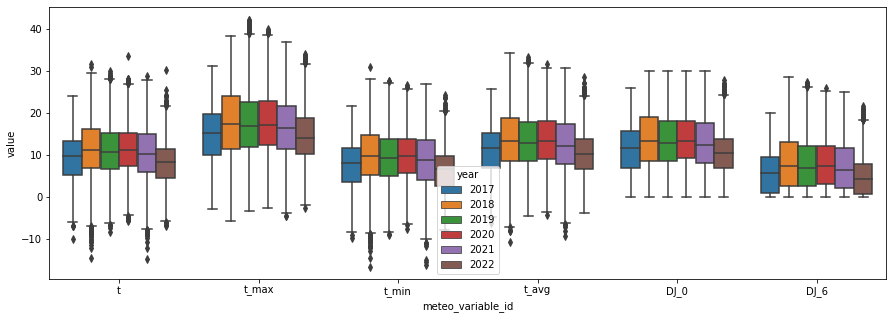

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_temp, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [14]:
data_single_rain = data_single.drop(['t', 't_max', 't_min', 't_avg', 'DJ_0', 'DJ_6'], axis=1)

In [15]:
data_single_rain = data_single_rain.melt(id_vars=['id_sta', 'year'])

In [16]:
data_single_rain

,id_sta,year,meteo_variable_id,value
0,7005,2017,rr24,2.857143
1,7005,2017,rr24,4.925000
2,7005,2017,rr24,2.175000
3,7005,2017,rr24,0.775000
4,7005,2017,rr24,0.087500
...,...,...,...,...
72880,7790,2022,rr24,-0.037500
72881,7790,2022,rr24,0.125000
72882,7790,2022,rr24,0.050000
72883,7790,2022,rr24,0.175000


<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

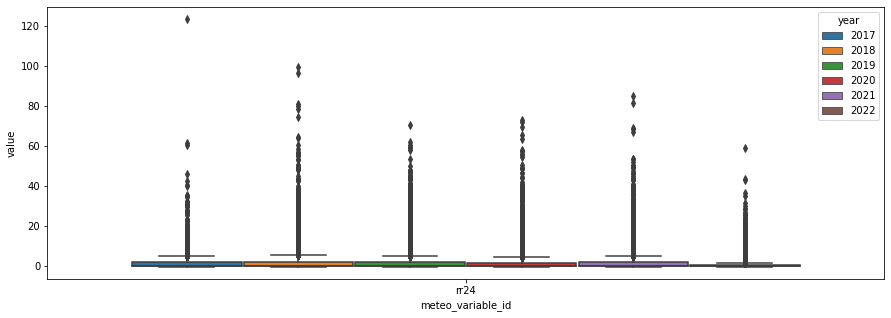

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [18]:
valueList = data_single_rain['value'].tolist()
valueList.sort()
thresholds = []
for i in range(100):
    threshold = valueList[int(len(valueList) * (0.99 + i * 0.0001))]
    thresholds.append(threshold)

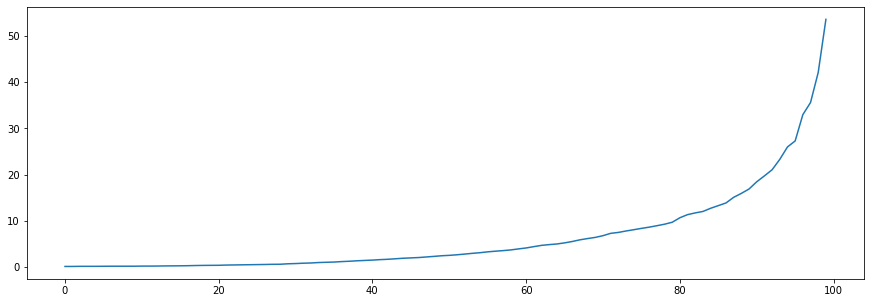

In [19]:
x = [i for i in range(100)]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(x, thresholds)

In [20]:
diff_thresholds = [thresholds[i + 1] - thresholds[i] for i in range(99)]

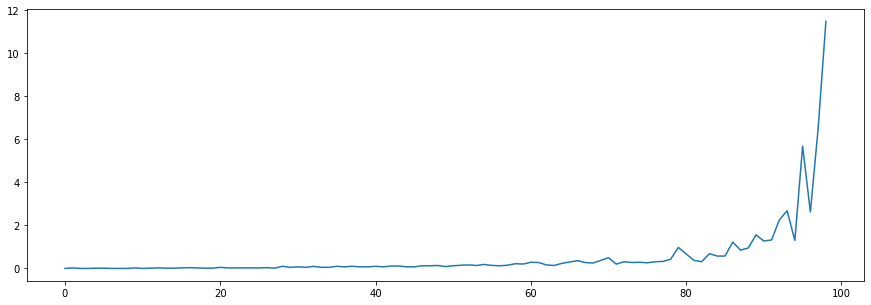

In [21]:
dx = [i for i in range(99)]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(dx, diff_thresholds)

In [22]:
diff_thresholds_10 = []
for i in range(90):
    sum = 0
    for j in range(i, i + 10):
        sum += diff_thresholds[j]
    diff_thresholds_10.append(sum / 10.0)

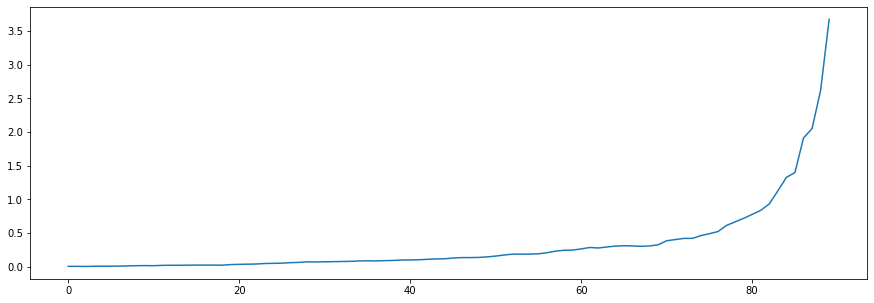

In [23]:
dx_10 = [i for i in range(90)]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(dx_10, diff_thresholds_10)

In [24]:
threshold = valueList[int(len(valueList) * 0.997)]

In [25]:
data_single_rain_997 = data_single_rain[data_single_rain['value'] < threshold]

<AxesSubplot:ylabel='Frequency'>

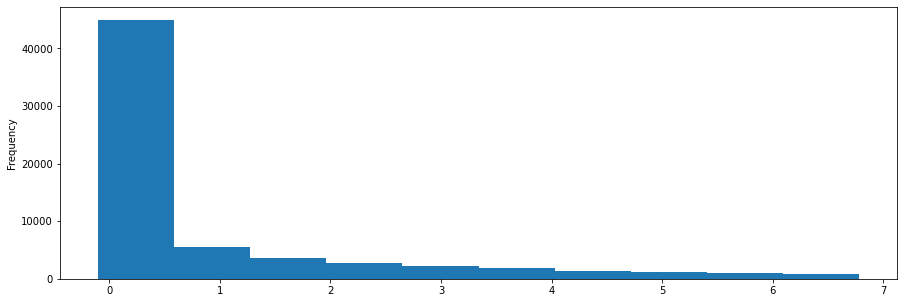

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
data_single_rain_997['value'].plot.hist(bins=10)

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

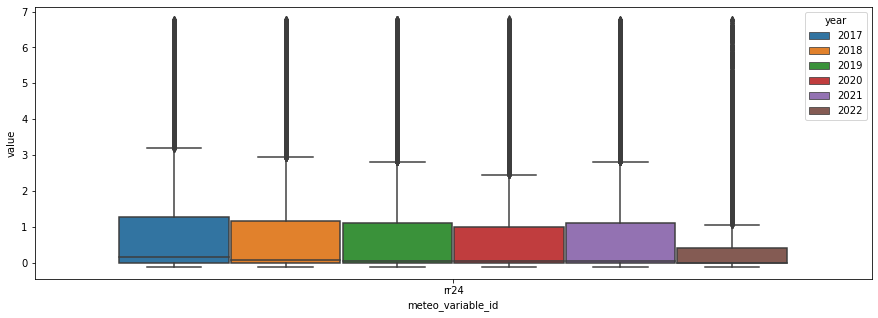

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_997, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [28]:
data_single_rain_positive = data_single_rain[data_single_rain['value'] > 0.00001]
data_single_rain_negative = data_single_rain[data_single_rain['value'] < -0.00001]

In [29]:
data_no_zero = [data_single_rain_positive, data_single_rain_negative]
data_no_zero = pd.concat(data_no_zero)

In [30]:
valueList = data_no_zero['value'].tolist()
valueList.sort()
thresholds = []
for i in range(200):
    threshold = valueList[int(len(valueList) * (0.8 + i * 0.001))]
    thresholds.append(threshold)

In [31]:
diff_thresholds = [thresholds[i + 1] - thresholds[i] for i in range(199)]
diff_thresholds_20 = []
for i in range(180):
    sum = 0
    for j in range(i, i + 20):
        sum += diff_thresholds[j]
    diff_thresholds_20.append(sum / 20.0)

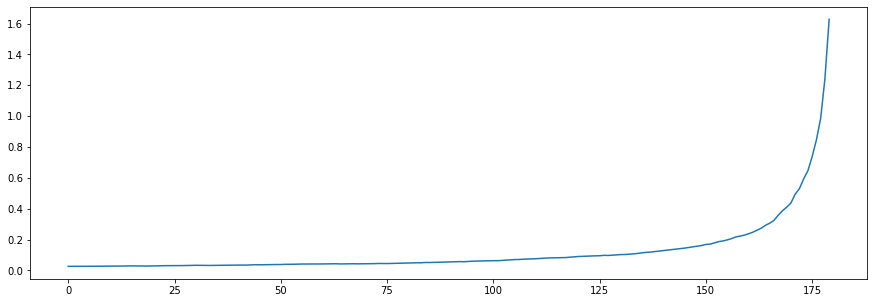

In [32]:
dx_20 = [i for i in range(180)]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.plot(dx_20, diff_thresholds_20)

In [33]:
threshold = valueList[int(len(valueList) * 0.95)]
data_no_zero_95 = data_no_zero[data_no_zero['value'] < threshold]

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

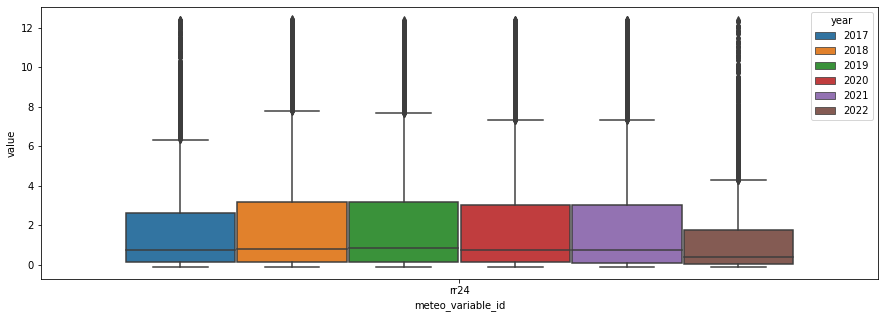

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_no_zero_95, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [35]:
data_single_rain_positive = data_single_rain[data_single_rain['value'] > 0.00001]

In [36]:
data_single_rain_positive

,id_sta,year,meteo_variable_id,value
0,7005,2017,rr24,2.857143
1,7005,2017,rr24,4.925000
2,7005,2017,rr24,2.175000
3,7005,2017,rr24,0.775000
4,7005,2017,rr24,0.087500
...,...,...,...,...
72858,7790,2022,rr24,0.150000
72859,7790,2022,rr24,0.325000
72881,7790,2022,rr24,0.125000
72882,7790,2022,rr24,0.050000


In [37]:
data_single_rain_positive_1 = data_single_rain_positive[data_single_rain_positive['value'] < 1]

<AxesSubplot:ylabel='Frequency'>

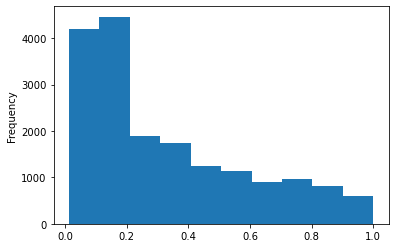

In [38]:
data_single_rain_positive_1['value'].plot.hist(bins=10)

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

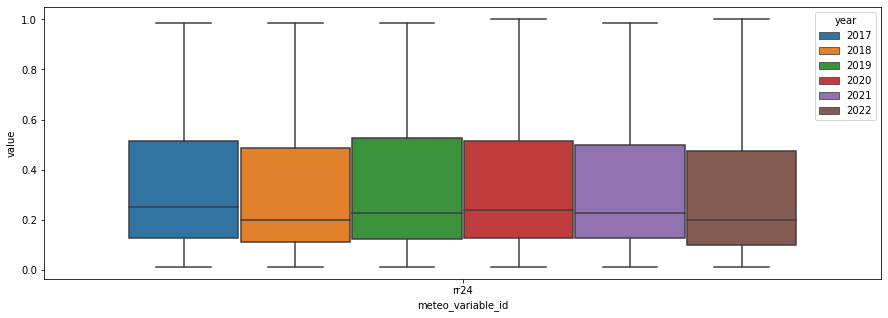

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_positive_1, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [40]:
data_single_rain_positive_10 = data_single_rain_positive[data_single_rain_positive['value'] > 1]
data_single_rain_positive_10 = data_single_rain_positive_10[data_single_rain_positive_10['value'] < 10]

<AxesSubplot:ylabel='Frequency'>

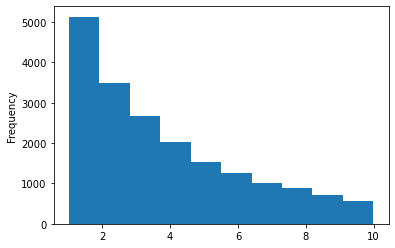

In [41]:
data_single_rain_positive_10['value'].plot.hist(bins=10)

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

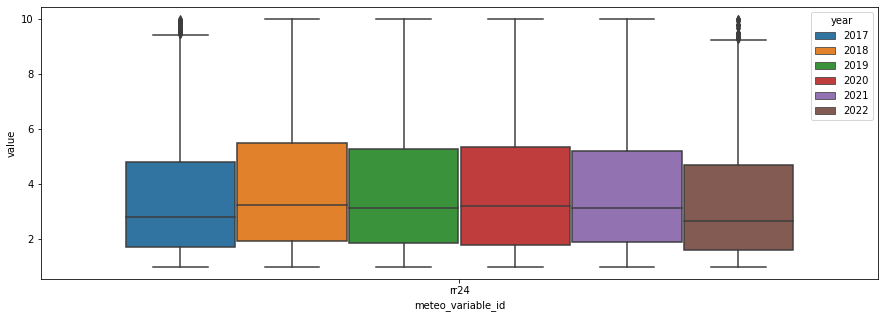

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_positive_10, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [43]:
data_single_rain_positive_20 = data_single_rain_positive[data_single_rain_positive['value'] > 10]
data_single_rain_positive_20 = data_single_rain_positive_20[data_single_rain_positive_20['value'] < 20]

<AxesSubplot:ylabel='Frequency'>

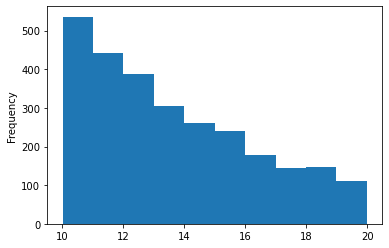

In [44]:
data_single_rain_positive_20['value'].plot.hist(bins=10)

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

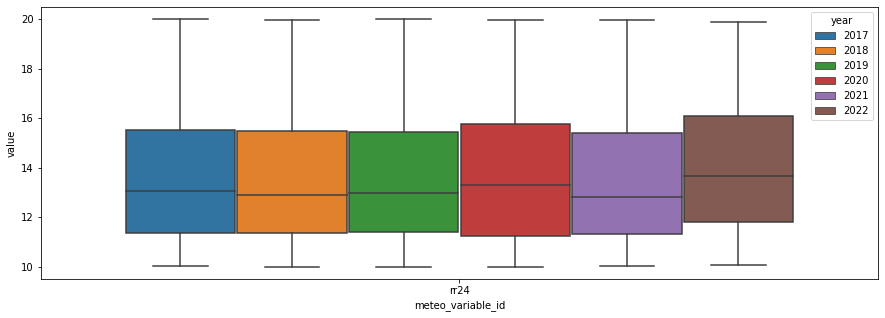

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_positive_20, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [46]:
data_single_rain_positive_others = data_single_rain_positive[data_single_rain_positive['value'] > 20]

<AxesSubplot:ylabel='Frequency'>

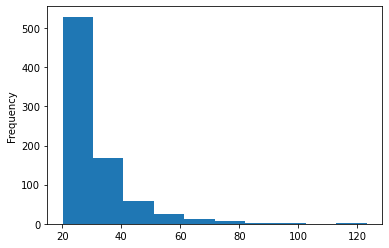

In [47]:
data_single_rain_positive_others['value'].plot.hist(bins=10)

<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

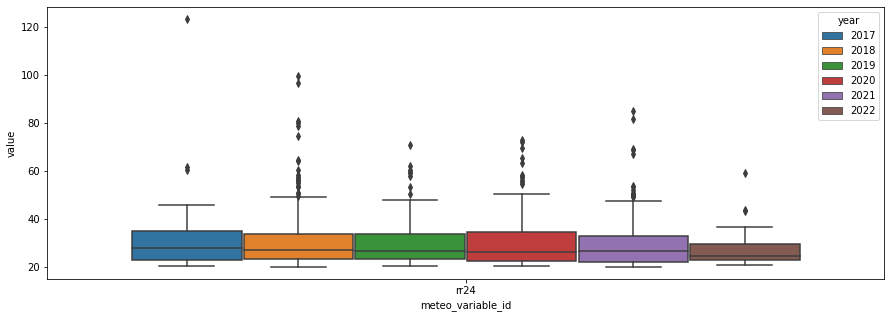

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_positive_others, x='meteo_variable_id', hue='year', y='value', ax=ax)

In [49]:
data_single_rain_negative = data_single_rain[data_single_rain['value'] < -0.00001]

In [50]:
data_single_rain_negative

,id_sta,year,meteo_variable_id,value
21,7005,2017,rr24,-0.0625
24,7005,2017,rr24,-0.0625
55,7005,2017,rr24,-0.0625
62,7005,2017,rr24,-0.0250
74,7005,2017,rr24,-0.0600
...,...,...,...,...
72764,7790,2022,rr24,-0.0250
72765,7790,2022,rr24,-0.0750
72782,7790,2022,rr24,-0.0250
72783,7790,2022,rr24,-0.0750


<AxesSubplot:xlabel='meteo_variable_id', ylabel='value'>

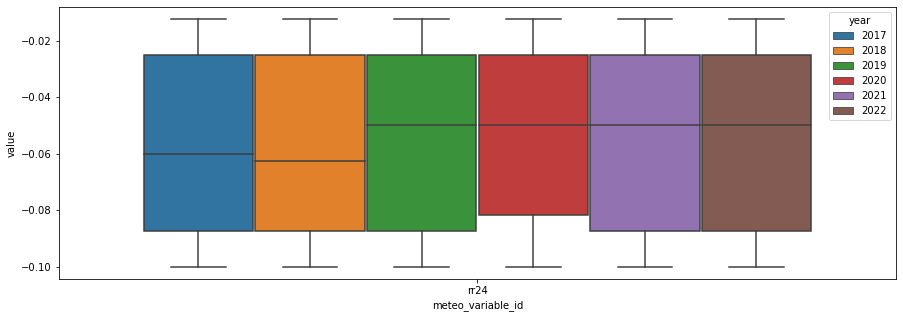

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.boxplot(data=data_single_rain_negative, x='meteo_variable_id', hue='year', y='value', ax=ax)